In [ ]:
!pip install prophet lightgbm statsmodels pmdarima 1> /dev/null 2> /dev/null

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
plt.style.use('fivethirtyeight')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import pmdarima

In [ ]:
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'

## Business Understanding

### Understanding COVID-19
notes...

### Research Goals
The goal of this research thesis is to make a weekly forecast on the number of deaths caused by COVID-19 in West Africa based on historic records of weekly COVID-19 deaths in the same region. The historic data will be explored to find insights and patterns in covid-19 fatality. Comparism of two statistical models - ARIMA and Prophet - and two machine learning models - Random Forest and Light Gradient Boosting Model (LGBM) will be carried out to select the best model. Based on the forecasted values the models will be evaluated using MAE, MAPE and RMSE to select the best performing model. The goals can be summarized as below:
1) Exploratory data analysis
2) Using cross-validation:
   1) Generate the statistical models - ARIMA and Prophet using the train data.
   2) Generate the machine learning models - Random Forest and LGBTM using the train data.
   3) Validate the models using the test data.


### Project Plan
#### Assessment of tools and techniques
- Language: Python
- Libraries:
  - statsmodels - timeseris analysis, statistical models
  - Numpy & Pandas - data wrangling
  - Matplotlib - Visualizations
  - Scikit Learn - Random forest model and other machine learning tool
  - LightGBM - LGBM model
  - Prophet - Prophet model by Facebook
  - Streamlit - Deployment

## Data Understanding
### Data collection
The data needed is the covid-19 death records in West Africa during the outbreak

 Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) provides a [github repository](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series) containing daily records of COVID-19 variables like cases, deaths and recoveries which is used to run their covid-19 dashboard. The datasets contain daily records of COVID-19 data for 199 countries, all west African countries included. The datasets are updated daily to accout for the new cases recorded.



### Data description
<html>
<body link="#0563C1" vlink="#954F72" class=xl65>

<table border=0 cellpadding=0 cellspacing=0 width=683 style='border-collapse:
 collapse;table-layout:fixed;width:512pt;box-sizing: unset;border-spacing: 0px;
 color:var(--jp-ui-font-color1)'>
 <col class=xl70 width=175 style='mso-width-source:userset;mso-width-alt:6400;
 width:131pt'>
 <col class=xl65 width=171 style='mso-width-source:userset;mso-width-alt:6253;
 width:128pt'>
 <col class=xl65 width=132 style='mso-width-source:userset;mso-width-alt:4827;
 width:99pt'>
 <col class=xl65 width=205 style='mso-width-source:userset;mso-width-alt:7497;
 width:154pt'>
 <tr height=39 style='mso-height-source:userset;height:29.25pt;box-sizing: unset;
  max-width:none;background:var(--jp-layout-color0)'>
  <td height=39 class=xl69 width=175 style='height:29.25pt;width:131pt'>Dataset</td>
  <td class=xl66 width=171 style='border-left:none;width:128pt'>Attribute</td>
  <td class=xl66 width=132 style='border-left:none;width:99pt'>Type</td>
  <td class=xl66 width=205 style='border-left:none;width:154pt'>Description</td>
 </tr>
 <tr height=62 style='mso-height-source:userset;height:46.5pt;box-sizing: unset;
  max-width:none;background:var(--jp-rendermime-table-row-background)'>
  <td rowspan=5 height=304 class=xl69 width=175 style='height:228.0pt;
  border-top:none;width:131pt;box-sizing: unset;max-width:none'>time_series_covid19_confirmed_global.csv</td>
  <td class=xl67 width=171 style='border-top:none;border-left:none;width:128pt;
  box-sizing: unset;max-width:none'>Province/State</td>
  <td class=xl67 width=132 style='border-top:none;border-left:none;width:99pt;
  box-sizing: unset;max-width:none'>string</td>
  <td class=xl67 width=205 style='border-top:none;border-left:none;width:154pt;
  box-sizing: unset;max-width:none'>state or province for countries that are
  listed by states or provinces</td>
 </tr>
 <tr height=39 style='mso-height-source:userset;height:29.25pt'>
  <td height=39 class=xl67 width=171 style='height:29.25pt;border-top:none;
  border-left:none;width:128pt;box-sizing: unset;max-width:none'>Country/Region</td>
  <td class=xl67 width=132 style='border-top:none;border-left:none;width:99pt;
  box-sizing: unset;max-width:none'>string</td>
  <td class=xl67 width=205 style='border-top:none;border-left:none;width:154pt;
  box-sizing: unset;max-width:none'>Country in focus</td>
 </tr>
 <tr height=39 style='mso-height-source:userset;height:29.25pt'>
  <td height=39 class=xl67 width=171 style='height:29.25pt;border-top:none;
  border-left:none;width:128pt;box-sizing: unset;max-width:none'>Lat</td>
  <td class=xl67 width=132 style='border-top:none;border-left:none;width:99pt;
  box-sizing: unset;max-width:none'>float</td>
  <td class=xl67 width=205 style='border-top:none;border-left:none;width:154pt;
  box-sizing: unset;max-width:none'>Latitude of the state or country</td>
 </tr>
 <tr height=39 style='mso-height-source:userset;height:29.25pt'>
  <td height=39 class=xl67 width=171 style='height:29.25pt;border-top:none;
  border-left:none;width:128pt;box-sizing: unset;max-width:none'>long</td>
  <td class=xl67 width=132 style='border-top:none;border-left:none;width:99pt;
  box-sizing: unset;max-width:none'>float</td>
  <td class=xl67 width=205 style='border-top:none;border-left:none;width:154pt;
  box-sizing: unset;max-width:none'>Longitude of the state or country</td>
 </tr>
 <tr height=125 style='mso-height-source:userset;height:93.75pt'>
  <td height=125 class=xl67 width=171 style='height:93.75pt;border-top:none;
  border-left:none;width:128pt;box-sizing: unset;max-width:none'>daily records</td>
  <td class=xl67 width=132 style='border-top:none;border-left:none;width:99pt;
  box-sizing: unset;max-width:none'>int</td>
  <td class=xl67 width=205 style='border-top:none;border-left:none;width:154pt'>A
  progressive list of time-series columns each representing the record of the
  confirmed cases for a day starting from 22nd of Januuary 2020</td>
 </tr>
 <tr height=66 style='mso-height-source:userset;height:49.5pt;box-sizing: unset;
  max-width:none;background:var(--jp-layout-color0)'>
  <td rowspan=5 height=322 class=xl69 width=175 style='height:241.5pt;
  border-top:none;width:131pt;box-sizing: unset;max-width:none'>time_series_covid19_deaths_global.csv</td>
  <td class=xl67 width=171 style='border-top:none;border-left:none;width:128pt;
  box-sizing: unset;max-width:none'>Province/State</td>
  <td class=xl67 width=132 style='border-top:none;border-left:none;width:99pt;
  box-sizing: unset;max-width:none'>string</td>
  <td class=xl67 width=205 style='border-top:none;border-left:none;width:154pt;
  box-sizing: unset;max-width:none'>state or province for countries that are
  listed by states or provinces</td>
 </tr>
 <tr height=39 style='mso-height-source:userset;height:29.25pt'>
  <td height=39 class=xl67 width=171 style='height:29.25pt;border-top:none;
  border-left:none;width:128pt;box-sizing: unset;max-width:none'>Country/Region</td>
  <td class=xl67 width=132 style='border-top:none;border-left:none;width:99pt;
  box-sizing: unset;max-width:none'>string</td>
  <td class=xl67 width=205 style='border-top:none;border-left:none;width:154pt;
  box-sizing: unset;max-width:none'>Country in focus</td>
 </tr>
 <tr height=39 style='mso-height-source:userset;height:29.25pt'>
  <td height=39 class=xl67 width=171 style='height:29.25pt;border-top:none;
  border-left:none;width:128pt;box-sizing: unset;max-width:none'>Lat</td>
  <td class=xl67 width=132 style='border-top:none;border-left:none;width:99pt;
  box-sizing: unset;max-width:none'>float</td>
  <td class=xl67 width=205 style='border-top:none;border-left:none;width:154pt;
  box-sizing: unset;max-width:none'>Latitude of the state or country</td>
 </tr>
 <tr height=39 style='mso-height-source:userset;height:29.25pt'>
  <td height=39 class=xl67 width=171 style='height:29.25pt;border-top:none;
  border-left:none;width:128pt;box-sizing: unset;max-width:none'>long</td>
  <td class=xl67 width=132 style='border-top:none;border-left:none;width:99pt;
  box-sizing: unset;max-width:none'>float</td>
  <td class=xl67 width=205 style='border-top:none;border-left:none;width:154pt;
  box-sizing: unset;max-width:none'>Longitude of the state or country</td>
 </tr>
 <tr height=139 style='mso-height-source:userset;height:104.25pt'>
  <td height=139 class=xl68 width=171 style='height:104.25pt;border-top:none;
  border-left:none;width:128pt;box-sizing: unset;max-width:none;color:rgba(0, 0, 0, 0.87);
  font-variant-ligatures: normal;font-variant-caps: normal;orphans: 2;
  text-align:start;widows: 2;-webkit-text-stroke-width: 0px;text-decoration-thickness: initial;
  text-decoration-style: initial;text-decoration-color: initial'>daily records</td>
  <td class=xl68 width=132 style='border-top:none;border-left:none;width:99pt;
  box-sizing: unset;max-width:none;color:rgba(0, 0, 0, 0.87);font-variant-ligatures: normal;
  font-variant-caps: normal;orphans: 2;text-align:start;widows: 2;-webkit-text-stroke-width: 0px;
  text-decoration-thickness: initial;text-decoration-style: initial;text-decoration-color: initial'>int</td>
  <td class=xl67 width=205 style='border-top:none;border-left:none;width:154pt'>A
  progressive list of time-series columns each representing the record of the
  confirmed death cases for a day starting from 22nd of Januuary 2020</td>
 </tr>
 <tr class=xl65 height=20 style='height:15.0pt'>
  <td height=20 class=xl70 width=175 style='height:15.0pt;width:131pt'></td>
  <td class=xl65 width=171 style='width:128pt'></td>
  <td class=xl65 width=132 style='width:99pt'></td>
  <td class=xl65 width=205 style='width:154pt'></td>
 </tr>
 <![if supportMisalignedColumns]>
 <tr height=0 style='display:none'>
  <td width=175 style='width:131pt'></td>
  <td width=171 style='width:128pt'></td>
  <td width=132 style='width:99pt'></td>
  <td width=205 style='width:154pt'></td>
 </tr>
 <![endif]>
</table>

</body>

</html>

### Data exploration

In [ ]:
wafr_countries = {
    "Benin" : "BEN",
    "Burkina Faso" : "BFA",
    "Cabo Verde" : "CPV",
    "Cote d'Ivoire" : "CIV",
    "Gambia" : "GMB",
    "Ghana" : "GHA",
    "Guinea" : "GIN",
    "Guinea-Bissau" : "GIN",
    "Liberia" : "LBR",
    "Mali" : "MLI",
    "Mauritania" : "MRT",
    "Niger" : "NER",
    "Nigeria" : "NGA",
    "Senegal" : "SEN",
    "Sierra Leone" : "SLE",
    "Togo" : "TGO"
}

In [ ]:
def prepare_data(path):
    data = pd.read_csv(path).set_index(keys= "Country/Region").drop(columns= ["Province/State", "Lat", "Long"])
    data.columns = pd.to_datetime(data.columns)
    wafr_data = data.loc[wafr_countries.keys()]#.sum()["2020-02-28":]
    wafr_data = wafr_data.T["2020-03-01" : "2022-05-26"]
    return wafr_data

In [ ]:
cases = prepare_data("../datasets/time_series_covid19_confirmed_global.csv")

deaths = prepare_data("../datasets/time_series_covid19_deaths_global.csv")

fig 1


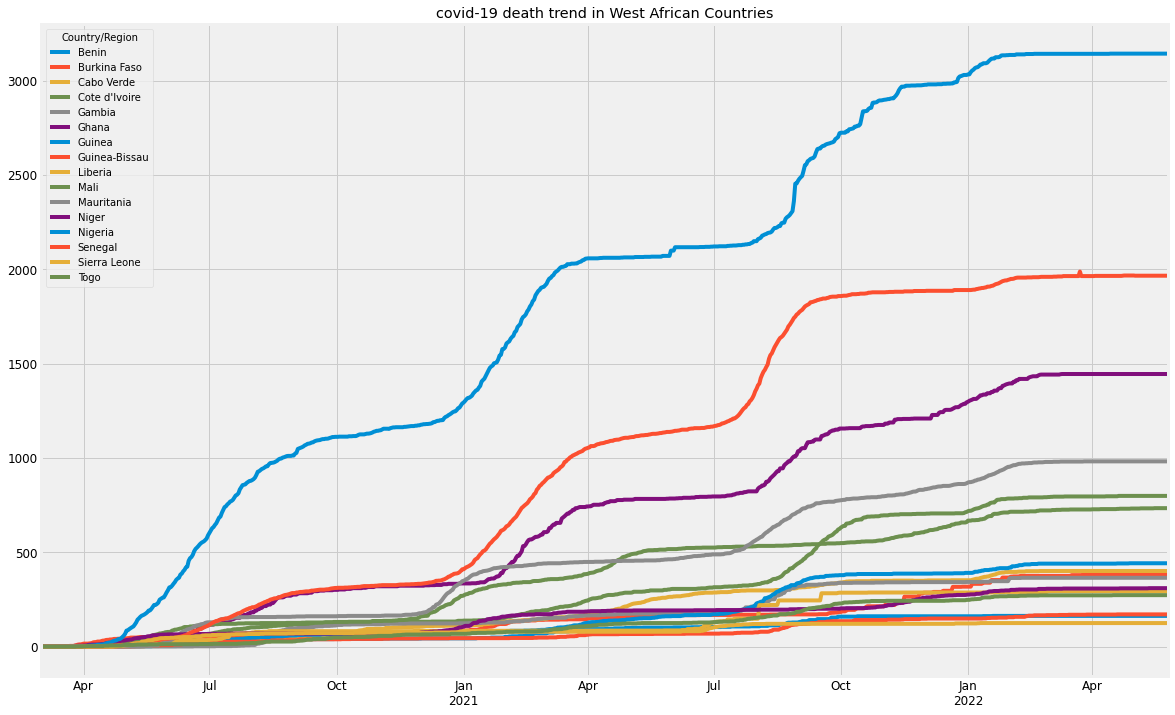

In [ ]:
ax = deaths.plot(title = "covid-19 death trend in West African Countries", figsize= (18, 12))
ax.figure.savefig("../plots/data_exploration/" + "covid-19 death trend in West African Countries.png")
print("fig 1")

fig 2


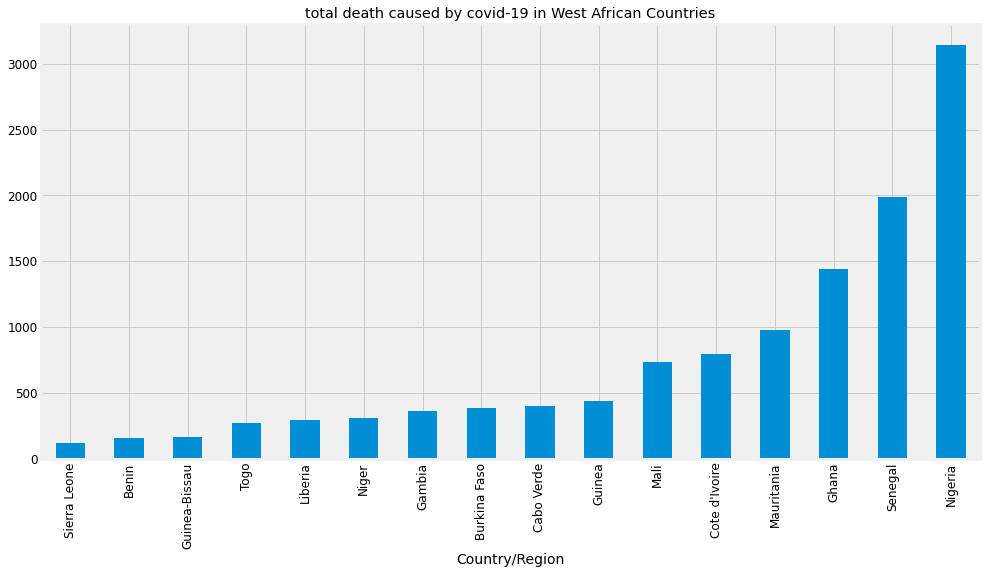

In [ ]:
ax = deaths.max().sort_values().plot(kind = "bar", title = "total death caused by covid-19 in West African Countries", figsize = (15, 8))
ax.figure.savefig("../plots/data_exploration/" + "total death caused by covid-19 in West African Countries.png")
print("fig 2")

In [ ]:
print("fig 3.")
deaths.max().sort_values()

fig 3.


Country/Region
Sierra Leone      125
Benin             163
Guinea-Bissau     171
Togo              273
Liberia           294
Niger             310
Gambia            365
Burkina Faso      384
Cabo Verde        401
Guinea            442
Mali              734
Cote d'Ivoire     799
Mauritania        982
Ghana            1445
Senegal          1988
Nigeria          3143
dtype: int64

Nigeria being the largest economy and country by populatuion in Africa also has the highest mortality rate as seen in fig 1. and fig 2. with total deaths of 3143. The second and the third country being Senegal and Ghana respectively had total death tolls of 1988 and 1445 respectively.

10 West African countries had a death toll below 500 with Sierra Leone having the lowest at 125 death case as shown in fig 2. and fig 3.

The trend of the pandemic's deaths in each country shown in fig 1. shows a regular pattern for all West African countries. For each country, there has been an uptrend in the number of deaths since the start of the pandemic until the year 2022, which has shown a rather flat trend with the number of deaths dropping significantly in all countries.

In [ ]:
print("cases and deaths trend for each country")

cases and deaths trend for each country


In [ ]:
# for i in deaths.columns:
#     ax = cases[[i]].merge(deaths[[i]], left_index = True, right_index = True)\
#     .rename(columns = {i+"_x" : "cases", i+"_y" : "deaths"}).plot(figsize = (12, 6), xlabel = i)
#     ax.figure.savefig("../plots/data_exploration/" + i + "_cases+deaths.png")

In [ ]:
print("death trend for each country")

death trend for each country


In [ ]:
# for i in deaths.columns:
#     ax = deaths[[i]].rename(columns = {i : "deaths"}).plot(figsize = (12, 6), xlabel = i)
#     ax.figure.savefig("../plots/data_exploration/" + i + "_deaths.png")

### Data quality verification
JHU CSSE in their COVID-19 dataset [github repository](https://github.com/CSSEGISandData/COVID-19) listed all sources which they aggragate their data from and are mostly official government sources. The full list can be checked in their [github repository](https://github.com/CSSEGISandData/COVID-19)

## Data Prepartion
### Data selection
Only row entries containing west African states data are selected from the cases dataset and death dataset

The columns needed are only the time-series record which started from 22nd of Januuary 2020 till date. From the cases dataset, West Africa didn't have any case till 28th of February 2020, so the column selection started from 28th of February till date

### Data Cleaning
Given the forecast will be weekly, the last timeseries column would be the last daily entry that ends the week and the others will be discarded. This will be useful during internal model development and testing but will not be useful after deployment as the programme will fetch the timeseries data at the end of every week

There are no missing values in the selected columns

### Data construction
The timeseries data available for both cases and deaths are daily records.

#### For the timeseries models, the following was done to construct data for modelling
- only the confirmed deaths dataset will be used as ARIMA and Prophet are both Univariate timeseries models
- To get total cases in West Africa for each day, the daily records from each country is summed up.
- The timeseries report on both dataset are cummulative i.e the total number of cases (same as death) is the total cases for that country/Region at that time. a 1st order differencing was done to get only the new cases for that day. 1st order differencing is done by subtracting the new timeseries record (t) from the previous timeseries record (t<sub>-1</sub>) for all timeseries record (t<sub>n</sub>)
> t = t - t<sub>-1</sub>

#### For the Machine Learning models, the following was done to construct data for modelling
- The daily number of confirmed cases and deaths data will be used when modelling with machine learning models. Since the the number of confirmed deaths is influenced by the number of confirmed cases, it is useful to add the confirmed cases data as a feature in the machine learning models.
- For both datasets the sum of each day's record by the west African countries was done give the West African daily record
- a 1st order differencing was done on both data to get the new cases instead of the cummulative cases
- The two datsets are merged with each data taking one column
- 1-day and 7-day Lagged results for both the cases and deaths column was made and merged with the data as they proved to be useful features during experimentation
- The original cases column was removed since the data won't be available in real life use but its lags
- The deaths column is seperated out to be used as the dependent variable (y) while the other four columns are the independent variables(X)


In [ ]:
path = "../datasets/"

In [ ]:
wafr_countries = {
    "Benin" : "BEN",
    "Burkina Faso" : "BFA",
    "Cabo Verde" : "CPV",
    "Cote d'Ivoire" : "CIV",
    "Gambia" : "GMB",
    "Ghana" : "GHA",
    "Guinea" : "GIN",
    "Guinea-Bissau" : "GIN",
    "Liberia" : "LBR",
    "Mali" : "MLI",
    "Mauritania" : "MRT",
    "Niger" : "NER",
    "Nigeria" : "NGA",
    "Senegal" : "SEN",
    "Sierra Leone" : "SLE",
    "Togo" : "TGO"
}

In [ ]:
def prepare_data_day(path):
    data = pd.read_csv(path).set_index(keys= "Country/Region").drop(columns= ["Province/State", "Lat", "Long"])
    data.columns = pd.to_datetime(data.columns)
    wafr_data = data.loc[wafr_countries.keys()].sum()["2020-03-01":]
    wafr_data = wafr_data - wafr_data.shift(1).fillna(0)
    wafr_data[wafr_data < 0] = 0
    return wafr_data

def prepare_ml_data(confirmed_data, deaths_data):
    confirmed_data.name = "confirmed_cases"
    deaths_data.name = "deaths"
    ml_data = pd.merge(confirmed_data, deaths_data, left_index= True, right_index= True)
    return ml_data

def prepare_ml_data_with_features(cases, deaths):
    ml_data = prepare_ml_data(cases, deaths)
    
    ml_data.columns = ["cases", "deaths"]
    ml_data.index.name = "dates(daily)"
    
    # making lagged data for cases and deaths
    for i in ml_data.columns:
        for j in [1,7]:
            ml_data[f"pd{j}_lagged_{i}"] = ml_data[i].shift(j).fillna(0)
            
    ml_data = ml_data.drop(columns = ["cases"])
    X, y = ml_data.drop(columns = "deaths"), ml_data.deaths
    ml_data = X.copy()
    ml_data["deaths"] = y
    return X, y

In [ ]:
def prepare_data_day_noshift(path):
    data = pd.read_csv(path).set_index(keys= "Country/Region").drop(columns= ["Province/State", "Lat", "Long"])
    data.columns = pd.to_datetime(data.columns)
    wafr_data = data.loc[wafr_countries.keys()].sum()["2020-03-1":"2022-06-26"]
    return wafr_data

def prepare_ml_data_weekly(confirmed_path, deaths_path):
    cases = prepare_data_day_noshift(confirmed_path)
    deaths = prepare_data_day_noshift(deaths_path)
    
    cases.name = "cases"
    deaths.name = "deaths"
    ml_data = pd.merge(cases, deaths, left_index= True, right_index= True)
    ml_data = ml_data.loc[ml_data.index[::7]]

    ml_data.index.name = "weekend"
    
    ml_data = ml_data - ml_data.shift(1).fillna(0)
    ml_data[ml_data < 0] = 0
    
    # making lagged data for cases and deaths
    for i in ml_data.columns:
        for j in range(1,3):
            ml_data[f"pd{j}_lagged_{i}"] = ml_data[i].shift(j).fillna(0)
            
    ml_data = ml_data.drop(columns = ["cases"])
    X, y = ml_data.drop(columns = "deaths"), ml_data.deaths
    ml_data = X.copy()
    ml_data["deaths"] = y
    return X, y, ml_data

In [ ]:
paths = ["time_series_covid19_deaths_global.csv", "time_series_covid19_confirmed_global.csv"]

In [ ]:
cases_day = prepare_data_day(path + paths[1])

In [ ]:
cases_day

2020-03-01       1.0
2020-03-02       1.0
2020-03-03       1.0
2020-03-04       2.0
2020-03-05       0.0
               ...  
2022-06-28     198.0
2022-06-29    1486.0
2022-06-30    1079.0
2022-07-01     880.0
2022-07-02     760.0
Length: 854, dtype: float64

In [ ]:
deaths_day = prepare_data_day(path + paths[0])

In [ ]:
# prepare_ml_data(cases_day, recovered_day, deaths_day).loc["2021"].style

### Test for Outliers using lag plots
By using lag plots the researcher made visible some outliers in the dataset. In the case of the confirmed cases dataset values greater than hundred are far from other values which are concentrated below 80

Text(0.5, 1.0, 'lag plot to show outliers in the death cases dataset')

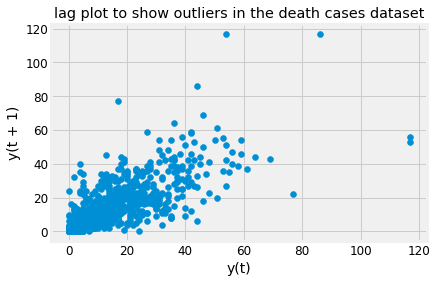

In [ ]:
pd.plotting.lag_plot(deaths_day, lag= 1)
plt.title("lag plot to show outliers in the death cases dataset")

### Test if data is stationary - Augmented Dickey-Fuller test
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

#### Visually
The stationarity of a data can also be roughly determined visually after seasonal decomposition of the data. But this is not an accurate way to tell for sure

#### Result
From the adf test carried out the deaths dataset is stationary but the cases dataset is not. This will be handled in the Modelling phase

In [ ]:
stationarity_test = []
data = [cases_day, deaths_day]
names = ["daily cases", "daily deaths"]
for i,j in zip(data, names):
    X = i.values
    result = adfuller(X)
    if result[1] > 0.05:
        stationarity_test.append((j, result[1], 0.05, "reject"))
    else:
        stationarity_test.append((j, result[1], 0.05, "accept"))

In [ ]:
test_stationary = pd.DataFrame(stationarity_test, columns = ["variable", "p-value", "threshold p-value", "accept/reject"])

In [ ]:
test_stationary

,variable,p-value,threshold p-value,accept/reject
0,daily cases,0.000575,0.05,accept
1,daily deaths,0.113248,0.05,reject


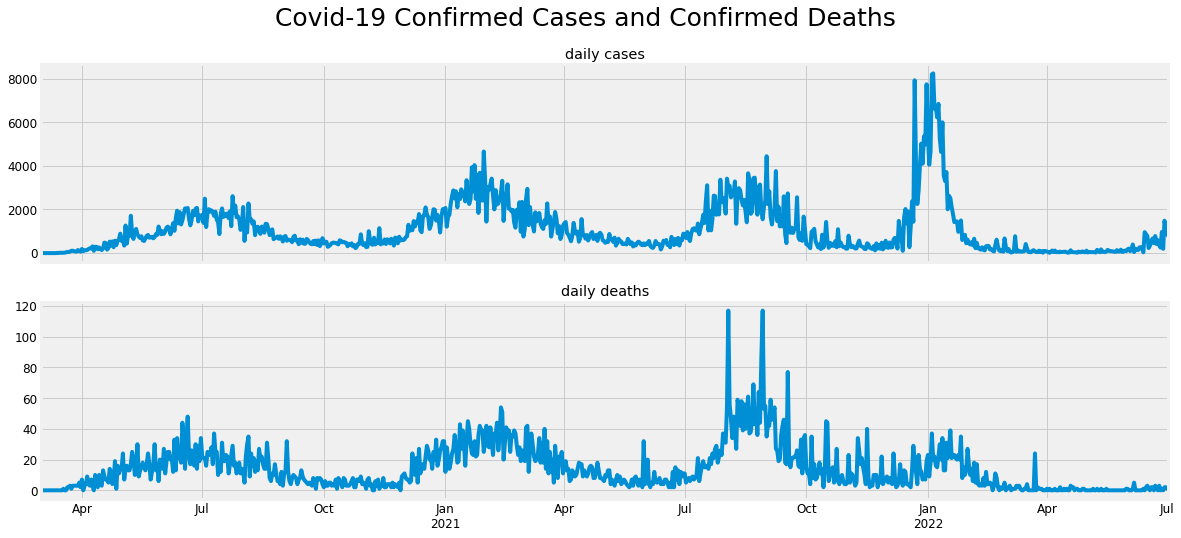

In [ ]:
fig, axs = plt.subplots(2,1, figsize = (18, 8), sharex= "col")
for df, ax, name in zip(data, axs.flatten(), names):
    (df).plot(ax = ax, title= name)
plt.suptitle("Covid-19 Confirmed Cases and Confirmed Deaths", size = 25);


seasonal decomposition of the deaths dataset


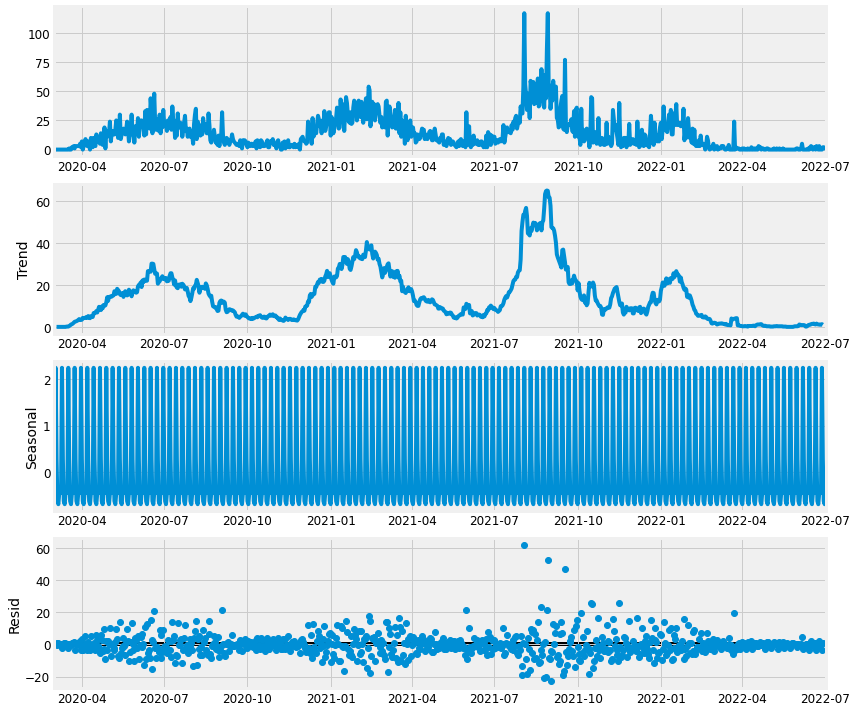

In [ ]:
rcParams['figure.figsize'] = (12, 10)
n = seasonal_decompose(deaths_day).plot();
print("seasonal decomposition of the deaths dataset")

### showing lag correlation using acf and pacf (auto regression)
A time series data is said to be autoregressive if a current can be obtained by a previous value or previous value. Similarly a model is autoregressive if it predicts future values based on past values.

ACF (auto-correlation function) describes how well the present value of the series is related with its past values

PACF (partial auto-correlation function) describes how a present value of a series is related to a past value after removing the effects which are already explained by the earlier lag(s) with the next lag

#### Result
- From the acf plot results, both the cases dataset and deaths dataset are highly autoregressive with correlations going farther than 30 lags for the deaths dataset and 22 for the cases dataset
- The Pacf plot also showed partial autocorrelation till the 9th lag for the deaths dataset and 7th lag for the cases dataset

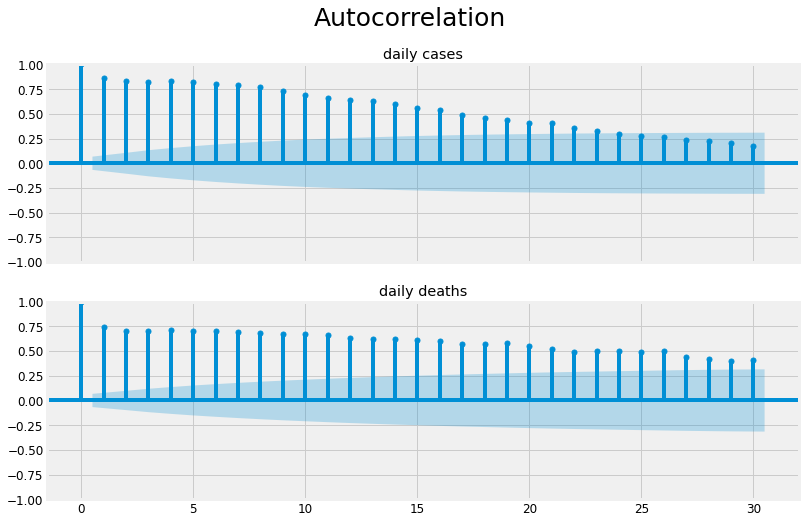

In [ ]:
fig, axs = plt.subplots(2,1, figsize = (12, 8), sharex= "col")
for df, ax, name in zip(data, axs.flatten(), names):
    plot_acf(df, ax=ax, title= name)
plt.suptitle("Autocorrelation", size = 25);


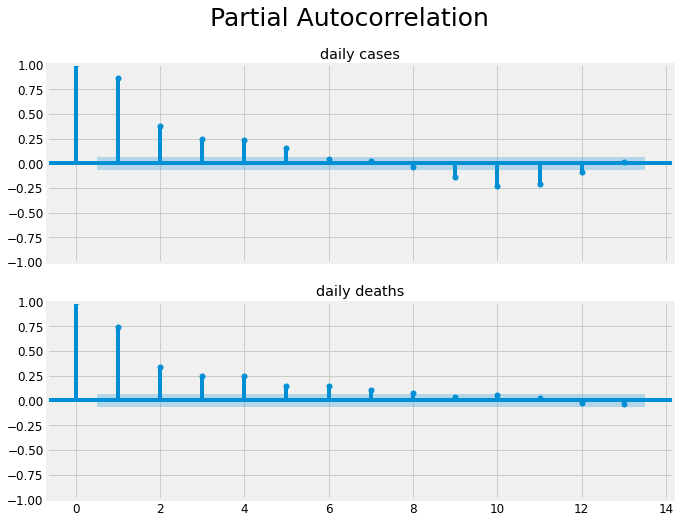

In [ ]:
fig, axs = plt.subplots(2,1, figsize = (10, 8), sharex= "col")
for df, ax, name in zip(data, axs.flatten(), names):
    plot_pacf(df, lags= 13, ax=ax, title= name)
plt.suptitle("Partial Autocorrelation", size = 25);


## Modelling

### Rolling Origin Cross Validation
Cross-validation is a statistical method to perform robust model evaluation. Cross validation gives the researcher a good estimate of the error of a model by training the model on different portions of the dataset and providing and average error. For example, in K-fold-Cross-Validation, the dataset will be splitted into several folds (i.e 3, 5, 10, 15 folds), then training of model is carried out on all folds except one which will be used for testing. This stepp will be repeated until the model has been  tested on all folds. The final metrics will be the average of error scores obtained in every fold. K-folds cross validation as well as other kinds prevents overfitting, and a more robust way to evaluate model performance than the traditional holdout/train-test format

In the case of time series, the cross-validation is not trivial. Random samples cannot be chosen at random and assigned to either the test set or the train set because it makes no sense to use the values from the future to forecast values in the past. Time series data is chronologically ordered, so models should avoid data leakage of future data through the training samples. The chronology of the Time series data must be preserved during modelling.

Rolling origin is a model evaluation technique where the forecast origin rolls forward in time and forecasts are produced from each origin (Svetunkov and Petropoulos, 2018). This method start with a small subset of data for training purpose (without shuffling), forecast for the later data points is made and then the error is calculated for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted.

For example, if the data set contains 12 months of data, 3 months can be allocated the training set and 1 month to the validation set. The origin is then rolled forward a month, and model retrained and evaluated on the next month. The process is repeated until the last month is got too giving a total of 9 test errors produced over the year. The averaged of the errors give the overall error estimate. The training set can be set to accumulate over-time (i.e. increasing in-sample size) __fig a. below__, for example by month 12, training set size may be 11 months with a single month as a validation set. Alternatively, the training set can be kept constant (i.e. constant in-sample size) __fig b. below__. In this work the origin is rolled forward 14 days at a time with new models built at each origin. The "TimeSeriesSplit" class in the python "Sci-Kit Learn" package was used to develop the rolling origin cross validation strategy with accumulative training set used in this work

__fig a.__
<img src="../plots/cv/timeseries_accumulated.png">

__fig b.__
<img src="../plots/cv/timeseriescv_constant.png">

In [ ]:
import itertools
# import warnings

from sklearn.model_selection import TimeSeriesSplit, train_test_split as tts
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error as MAPE, mean_squared_error as MSE

from sklearn.ensemble import RandomForestRegressor

from lightgbm import LGBMRegressor

import pmdarima as pm
from pmdarima.arima import ndiffs
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

from prophet import Prophet

# warnings.filterwarnings('ignore')
seed = 0

### Statistical Models

In [ ]:
days = 14
train, holdout = deaths_day.iloc[:-days], deaths_day.iloc[-days:]

In [ ]:
split = TimeSeriesSplit(n_splits= 15, test_size= 14)
cv_ind = split.split(train)  # indices of the cv folds

cv_data = []     # splits of the data into train-test folds
cv_ts = []       # splits of the time_series index into folds
for trn_ind, tst_ind in cv_ind:
    cv_data.append((train.iloc[trn_ind].values, train.iloc[tst_ind].values))
    cv_ts.append((train.index[trn_ind], train.index[tst_ind]))

#### ARIMA
__PROCEDURE__
- Hold out 2 weeks worth of the data for validation
- Estimate ARIMA differencing term, ``d`` on the remaining data using the ndiffs class in pmdarima library
- use the autoarima class to find the best parameter for p and q
- for model evaluation split the data using rolling origin cross validation of 15 folds with two weeks test set data. For each fold:   - fit the ARIMA model with the calculated p, d and q on the train fold 
   - calculate the MSE of the model using the test fold
   - store the MSE value in a list
- calculate the average MSE value from the MSE list to calculate the error of the model
- To have a test of how well the model will perform with real data, the model is tested on the held out data and the MSE is calculated. If the error increased significantly, then the model will not be stable to real life data

#### Result
MSE mean after cross validation: 38.3406

MSE on heldout data: 1.1556779260950596

Plots are in code cells

In [ ]:
kpss_diffs = ndiffs(train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)
print(n_diffs)

1


In [ ]:
auto = pm.auto_arima(train, d=n_diffs, seasonal=False, stepwise=True, suppress_warnings=True,
                     max_p=6, max_Q= 6, trace=1, random_state= seed)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5953.007, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6306.631, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6145.477, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5951.855, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6304.631, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5950.748, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5949.075, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6070.274, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5946.540, Time=0.45 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6008.968, Time=0.25 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5948.445, Time=0.91 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5944.959, Time=1.83 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5948.619, Time=2.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5941.821, Time=3.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept

In [ ]:
order = auto.order
print(order)

(1, 1, 3)


In [ ]:
## cross validate
err_list = []
for trn, tst in cv_data:
    model = ARIMA(trn, order= order).fit()
    err = MSE(tst, model.forecast(len(tst)))
    err_list.append(err)

In [ ]:
print(f"MSE mean: {np.mean(err_list):.4f}, MSE std: {np.std(err_list):.4f}")

MSE mean: 38.3406, MSE std: 44.1156


In [ ]:
## test on held out data
forecasts= auto.predict(len(holdout))
err = MSE(holdout, forecasts)
print(err)

1.1556779260950596


In [ ]:
ARIMA_err = (np.mean(err_list), err)

#### Result

Text(0.5, 1.0, 'Actual daily historical data vs Predicted')

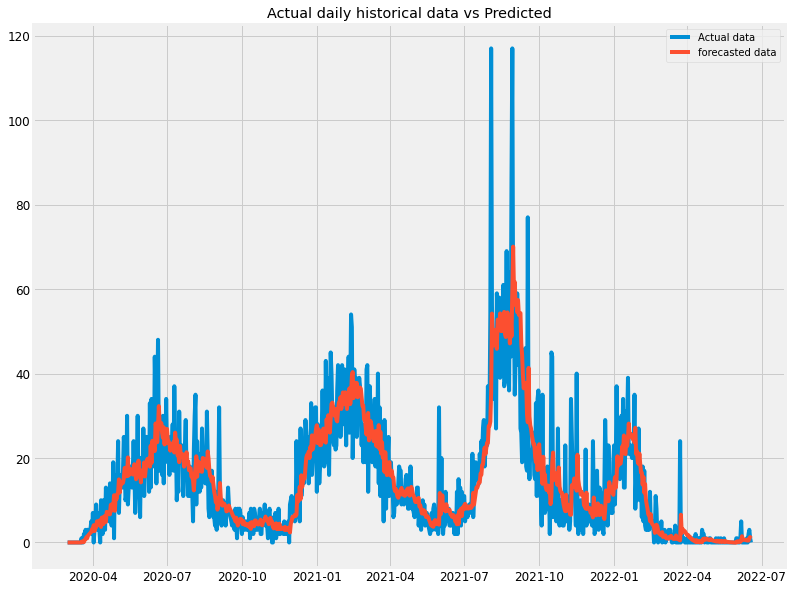

In [ ]:
ind = 0
train_slice = train.iloc[ind:]
xticks = train_slice.index.tolist()

plt.plot(xticks, train_slice.values)
plt.plot(xticks, auto.predict_in_sample()[ind:])
plt.legend(["Actual data", "forecasted data"])
plt.title("Actual daily historical data vs Predicted")

Text(0.5, 1.0, 'Actual daily historical data vs Predicted for 200 days')

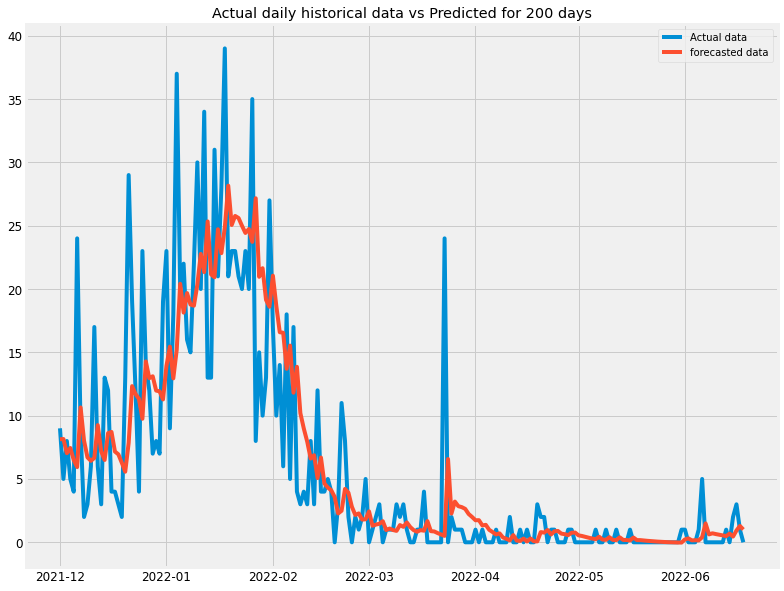

In [ ]:
ind = -200
train_slice = train.iloc[ind:]
xticks = train_slice.index.tolist()

plt.plot(xticks, train_slice.values)
plt.plot(xticks, auto.predict_in_sample()[ind:])
plt.legend(["Actual data", "forecasted data"])
plt.title(f"Actual daily historical data vs Predicted for {abs(ind)} days")

Text(0.5, 1.0, 'last 100 days plus 14 days forecast and actual')

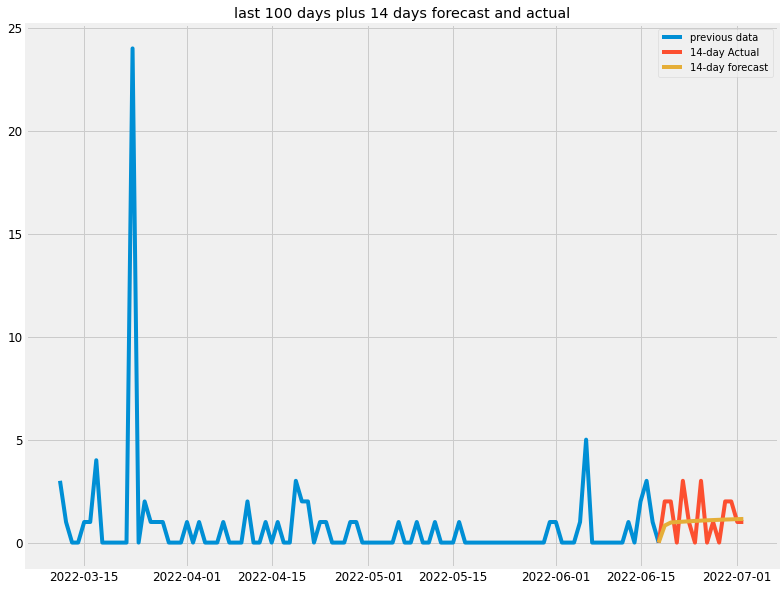

In [ ]:
ind = -100
train_slice = train.iloc[ind:]
xticks = train_slice.index.tolist()

n = len(holdout) + 1
forecast = forecast = [train_slice.iloc[-1]] + auto.predict(n - 1).tolist()
holdout_ = [train_slice.iloc[-1]] + holdout.iloc[:n-1].tolist()
holdout_xticks = pd.date_range(start = xticks[-1], periods = n)

plt.plot(xticks, train_slice.values)
plt.plot(holdout_xticks, holdout_)
plt.plot(holdout_xticks, forecast)

plt.legend(labels = ["previous data", f"{n-1}-day Actual", f"{n-1}-day forecast"])
plt.title(f"last {abs(ind)} days plus {n-1} days forecast and actual")

Text(0.5, 1.0, 'last 200 days plus 14 days forecast and actual')

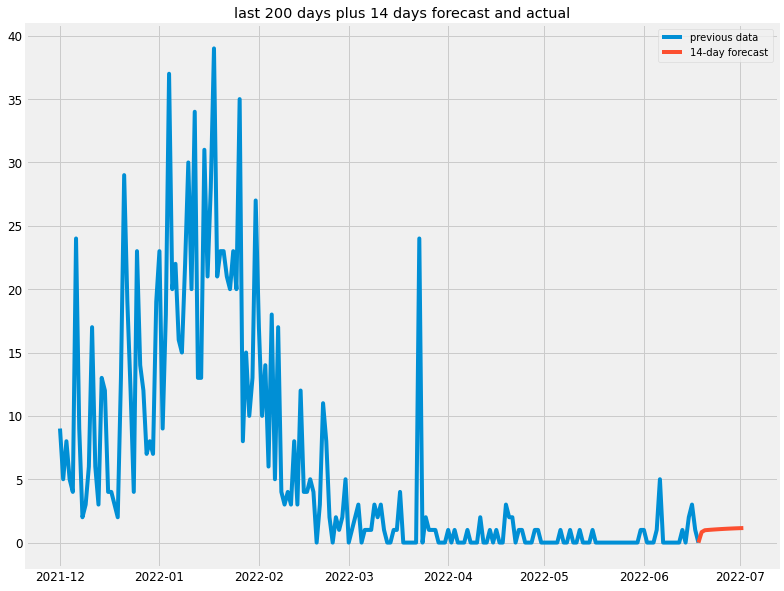

In [ ]:
ind = -200
train_slice = train.iloc[ind:]
xticks = train_slice.index.tolist()

n = 15
forecast = [train_slice.iloc[-1]] + auto.predict(n - 1).tolist()
holdout_xticks = pd.date_range(start = xticks[-1], periods = n).tolist()

plt.plot(xticks, train_slice.values)
plt.plot(holdout_xticks, forecast)
# plt.plot(range(len(holdout.iloc[:14])), holdout.iloc[:14].values)

plt.legend(labels = ["previous data", f"{n -1}-day forecast"])
plt.title(f"last {abs(ind)} days plus {n -1} days forecast and actual")

#### Prophet by Meta (previously Facebook)
Prophet is an open source time-series forecasting software released by Meta’s (Facebook) Core Data Science team. It is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well [cite](https://facebook.github.io/prophet/).

Prophet parameter tuning is fully automatic making it easy to use.

The prophet model uses a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation:
> y(t) = g(t) + s(t) + h(t) + t
[cite](https://doi.org/10.7287/peerj.preprints.3190v2)

Here g(t) is the trend function which models non-periodic changes in the value of the time series, s(t) represents periodic changes (e.g., weekly and yearly seasonality), and h(t) represents the effects of holidays which occur on potentially irregular schedules over one or more days. The error term t represents any distinguishing changes which are not accommodated by the model.

__PROCEDURE__
- Hold out 2 weeks worth of the data for validation
- for model evaluation split the data using rolling origin cross validation of 15 folds with two weeks test set data. For each fold:
   - fit the prophet model with on the train fold 
   - calculate the MSE of the model using the test fold
   - store the MSE value in a list
- calculate the average MSE value from the MSE list to calculate the error of the model
- To have a test of how well the model will perform with real data, the model is tested on the held out data and the MSE is calculated. If the error increased significantly, then the model will not be stable to real life data


#### Result
MSE mean after cross validation: 97.4101

MSE on heldout data: 16.034133074515896

In [ ]:
## cross validate
err_list = []
for (trn_ts, tst_ts), (trn, tst) in zip(cv_ts, cv_data):
    ## make data suitable for model
    df = pd.DataFrame(trn, index = trn_ts).reset_index()
    df.columns = ["ds", "y"]
    
    ## fit model
    model = Prophet()
    model.fit(df)
    
    ## make prediction
    future = model.make_future_dataframe(periods=len(tst))
    forecast = model.predict(future)['yhat'].values
    
    ## test prediction
    err = MSE(tst, forecast[-len(tst):])
    err_list.append(err)

08:51:27 - cmdstanpy - INFO - Chain [1] start processing
08:51:27 - cmdstanpy - INFO - Chain [1] done processing
08:51:28 - cmdstanpy - INFO - Chain [1] start processing
08:51:28 - cmdstanpy - INFO - Chain [1] done processing
08:51:30 - cmdstanpy - INFO - Chain [1] start processing
08:51:30 - cmdstanpy - INFO - Chain [1] done processing
08:51:31 - cmdstanpy - INFO - Chain [1] start processing
08:51:31 - cmdstanpy - INFO - Chain [1] done processing
08:51:33 - cmdstanpy - INFO - Chain [1] start processing
08:51:33 - cmdstanpy - INFO - Chain [1] done processing
08:51:34 - cmdstanpy - INFO - Chain [1] start processing
08:51:34 - cmdstanpy - INFO - Chain [1] done processing
08:51:36 - cmdstanpy - INFO - Chain [1] start processing
08:51:36 - cmdstanpy - INFO - Chain [1] done processing
08:51:37 - cmdstanpy - INFO - Chain [1] start processing
08:51:37 - cmdstanpy - INFO - Chain [1] done processing
08:51:39 - cmdstanpy - INFO - Chain [1] start processing
08:51:39 - cmdstanpy - INFO - Chain [1]

In [ ]:
print(f"MSE mean: {np.mean(err_list):.4f}, MSE std: {np.std(err_list):.4f}")

MSE mean: 97.4101, MSE std: 75.0071


In [ ]:
df = train.to_frame().reset_index()
df.columns = "ds", "y"
df.head()

,ds,y
0,2020-03-01,0.0
1,2020-03-02,0.0
2,2020-03-03,0.0
3,2020-03-04,0.0
4,2020-03-05,0.0


In [ ]:
model = Prophet()
model.fit(df)

08:54:22 - cmdstanpy - INFO - Chain [1] start processing
08:54:22 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=len(holdout))
forecasts= model.predict(future)

In [ ]:
## test on held out data
err = MSE(holdout, forecasts["yhat"][-len(holdout):])
print(err)

16.034133074515896


In [ ]:
prophet_err = (np.mean(err_list), err)

#### Results

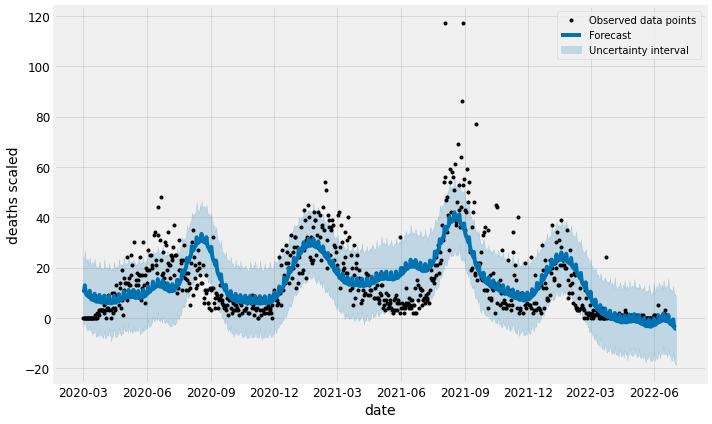

In [ ]:
fig1 = model.plot(forecasts, include_legend= True, ylabel= "deaths scaled", xlabel="date")

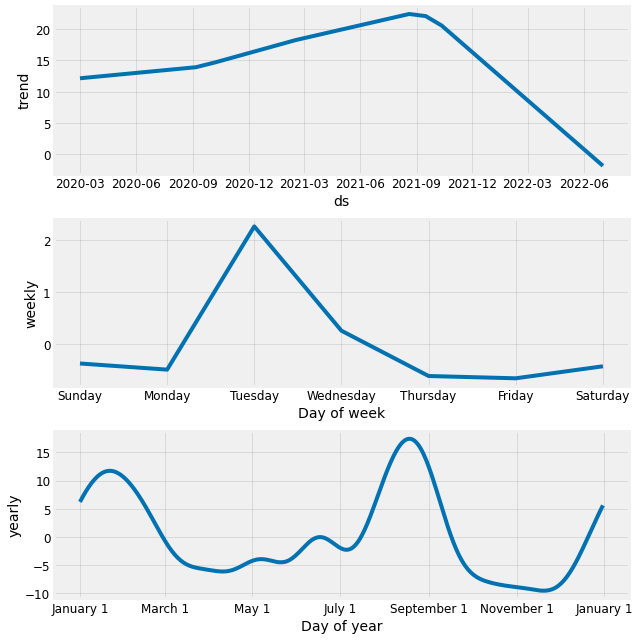

In [ ]:
fig2 = model.plot_components(forecasts, weekly_start=0)

Text(0.5, 1.0, 'Actual daily historical data vs Predicted')

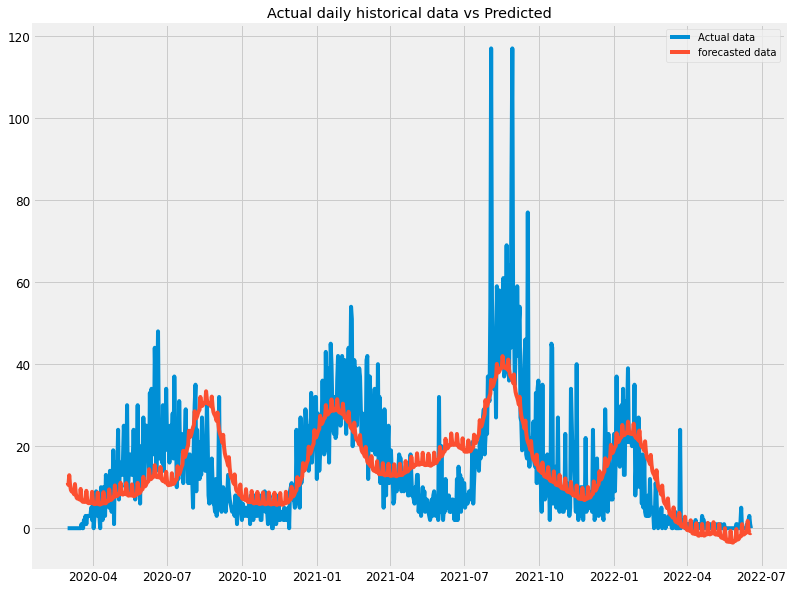

In [ ]:
ind = 0
train_slice = train.iloc[ind:]
xticks = train_slice.index.tolist()
in_forecast = model.predict()["yhat"]

plt.plot(xticks, train_slice.values)
plt.plot(xticks, in_forecast[ind:])
plt.legend(["Actual data", "forecasted data"])
plt.title("Actual daily historical data vs Predicted")

Text(0.5, 1.0, 'Actual daily historical data vs Predicted for 200 days')

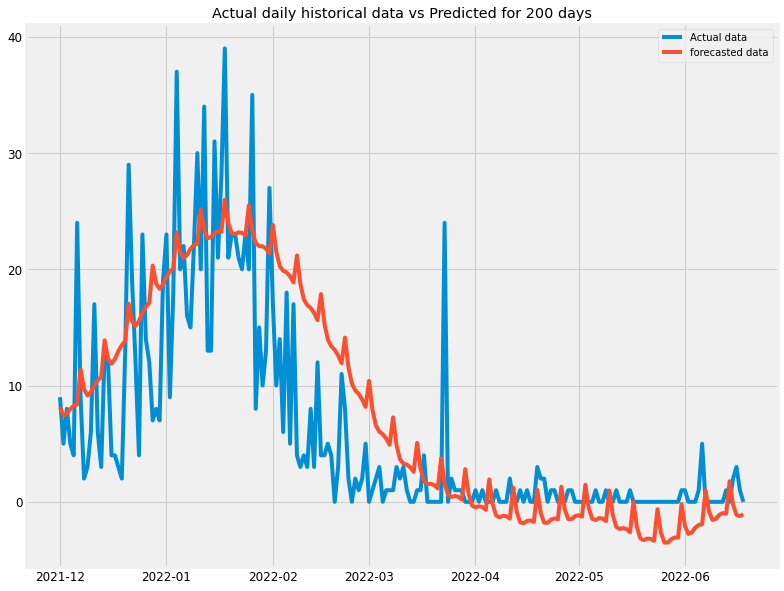

In [ ]:
ind = -200
train_slice = train.iloc[ind:]
xticks = train_slice.index.tolist()

plt.plot(xticks, train_slice.values)
plt.plot(xticks, in_forecast[ind:])
plt.legend(["Actual data", "forecasted data"])
plt.title(f"Actual daily historical data vs Predicted for {abs(ind)} days")

Text(0.5, 1.0, 'last 100 days plus 14 days forecast and actual')

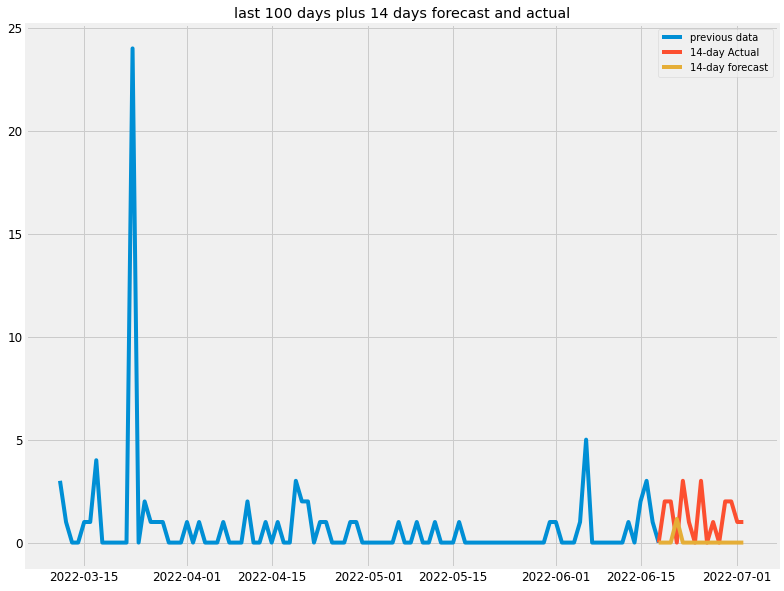

In [ ]:
ind = -100
train_slice = train.iloc[ind:]
xticks = train_slice.index.tolist()

n = len(holdout) + 1
# future = model.make_future_dataframe(periods=n)
# forecast = model.predict(future)["yhat"].iloc[-n+1:]
forecasts["yhat"][forecasts["yhat"] < 0] = 0
forecast = [train_slice.iloc[-1]] + forecasts["yhat"].iloc[-n+1:].tolist()
holdout_ = [train_slice.iloc[-1]] + holdout.iloc[:n-1].tolist()
holdout_xticks = pd.date_range(start = xticks[-1], periods = n)

plt.plot(xticks, train_slice.values)
plt.plot(holdout_xticks, holdout_)
plt.plot(holdout_xticks, forecast)

plt.legend(labels = ["previous data", f"{n-1}-day Actual", f"{n-1}-day forecast"])
plt.title(f"last {abs(ind)} days plus {n-1} days forecast and actual")

Text(0.5, 1.0, 'last 200 days plus 14 days forecast and actual')

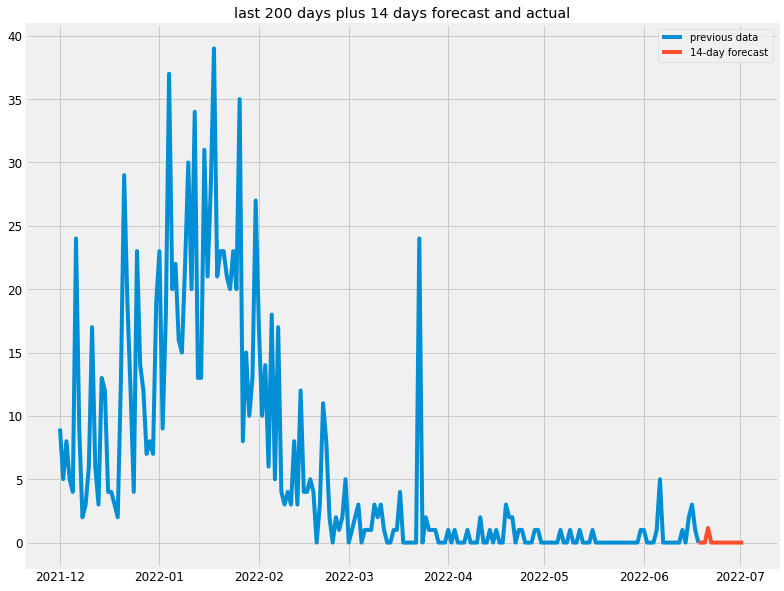

In [ ]:
ind = -200
train_slice = train.iloc[ind:]
xticks = train_slice.index.tolist()

n = 15
# forecast = model.predict(future)["yhat"].iloc[-n+1:]
# forecast[forecast < 0] = 0
forecast = [train_slice.iloc[-1]] + forecasts["yhat"].iloc[-n+1:].tolist()
holdout_xticks = pd.date_range(start = xticks[-1], periods = n).tolist()

plt.plot(xticks, train_slice.values)
plt.plot(holdout_xticks, forecast)
# plt.plot(range(len(holdout.iloc[:14])), holdout.iloc[:14].values)

plt.legend(labels = ["previous data", f"{n -1}-day forecast"])
plt.title(f"last {abs(ind)} days plus {n -1} days forecast and actual")

### ML Models
__PROCEDURE__
The procedure used for both Machine Learning models are the same and are outlined below:
- Hold out 2 weeks worth of the data for validation
- Carry out Random Search Cross validation (with rolling origin) to select the optimal hyperparameters values. The procedures are as below:
    - A) create the list of values for each selected hyperparameters
    - B) create a rolling origin cross validation of 15 folds with two weeks test set data with the TimeSeriesSplit class in the Scikit-Learn package
    - C) instanstiate the Machine Learning model Class (RandomForestRegressor, RandomForestRegressor)
    - D) pass A, B, C, D to the "RandomizedSearchCV" class in Scikit-Learn package
    - E) fit d to start the random search algorithm, the algorithm calculates the MSE value for each fold and returns the best model and best MSE error

- To have a test of how well the model will perform with real data, the model is tested on the held out data and the MSE is calculated. If the error increased significantly, then the model will not be stable to real life data


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_percentage_error as MAPE, mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

seed = 0

In [ ]:
days = 14
X,y = prepare_ml_data_with_features(cases_day, deaths_day)
X_train, X_holdout = X.iloc[:-days],  X.iloc[-days:]
y_train, y_holdout = y.iloc[:-days], y.iloc[-days:]

#### Random Forest Regressor
#### Hyperrameters
(n_estimators, max_depth)
#### Result
MSE mean after cross validation: 13.5719

MSE for heldout data: 36.9391

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 5)]
# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)] + [None]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth
              }
print(random_grid)

{'n_estimators': [100, 550, 1000, 1450, 1900], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}


In [ ]:
rf = RandomForestRegressor(criterion='squared_error', random_state = seed)       # base model to tune
# Random search of parameters, using 5 fold rolling basis cross validation, 
# search across 80 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 40, cv = TimeSeriesSplit(n_splits= 5, test_size= 14),
                               verbose=1, random_state=seed, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=14),
                   estimator=RandomForestRegressor(random_state=0), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'n_estimators': [100, 550, 1000, 1450,
                                                         1900]},
                   random_state=0, verbose=1)

In [ ]:
rf_random.best_params_

{'n_estimators': 1000, 'max_depth': 10}

In [ ]:
pd.DataFrame(rf_random.cv_results_).iloc[:, 6:].sort_values(by = "rank_test_score").head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,"{'n_estimators': 1000, 'max_depth': 10}",-0.502466,-6.393773,-23.472532,-27.440136,-10.050515,-13.571884,10.247792,1
17,"{'n_estimators': 1000, 'max_depth': 20}",-0.544937,-6.551951,-22.943507,-27.906734,-10.452258,-13.679877,10.217336,2
19,"{'n_estimators': 1000, 'max_depth': 60}",-0.544937,-6.541412,-22.943507,-27.906734,-10.480577,-13.683433,10.217026,3
35,"{'n_estimators': 1000, 'max_depth': 40}",-0.544937,-6.541412,-22.943507,-27.906734,-10.480577,-13.683433,10.217026,3
6,"{'n_estimators': 1000, 'max_depth': 70}",-0.544937,-6.541412,-22.943507,-27.906734,-10.480577,-13.683433,10.217026,3


In [ ]:
best_random = rf_random.best_estimator_
random_err = MSE(best_random.predict(X_holdout), y_holdout)

print(f"model_err: {random_err:.2f}")

model_err: 36.94


In [ ]:
rf_random.best_score_

-13.57188426643712

In [ ]:
RF_err = (abs(rf_random.best_score_), random_err)

<AxesSubplot:>

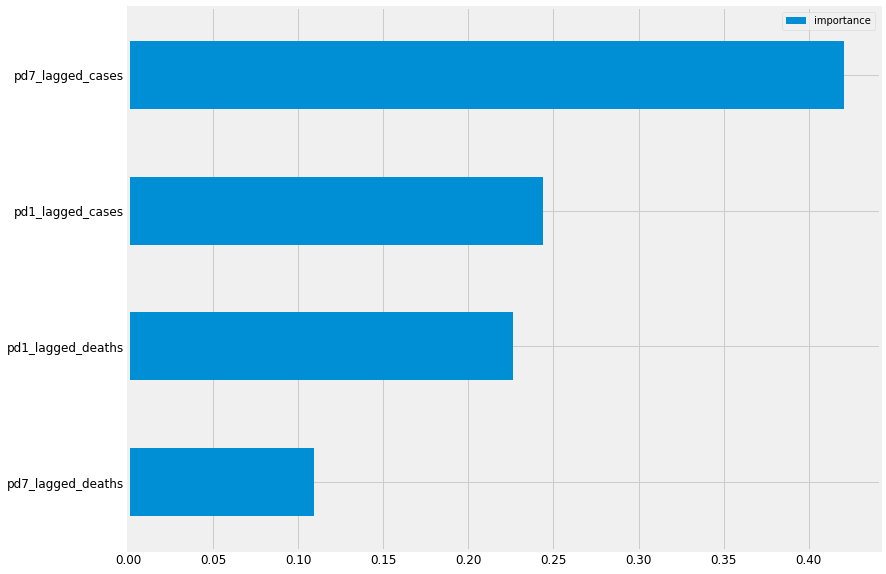

In [ ]:
pd.DataFrame(rf_random.best_estimator_.feature_importances_, index = X.columns).sort_values(by = 0, ascending=1)\
            .rename(columns = {0:"importance"}).plot(kind= "barh")

#### Result

Text(0.5, 1.0, 'Actual daily historical data vs Predicted')

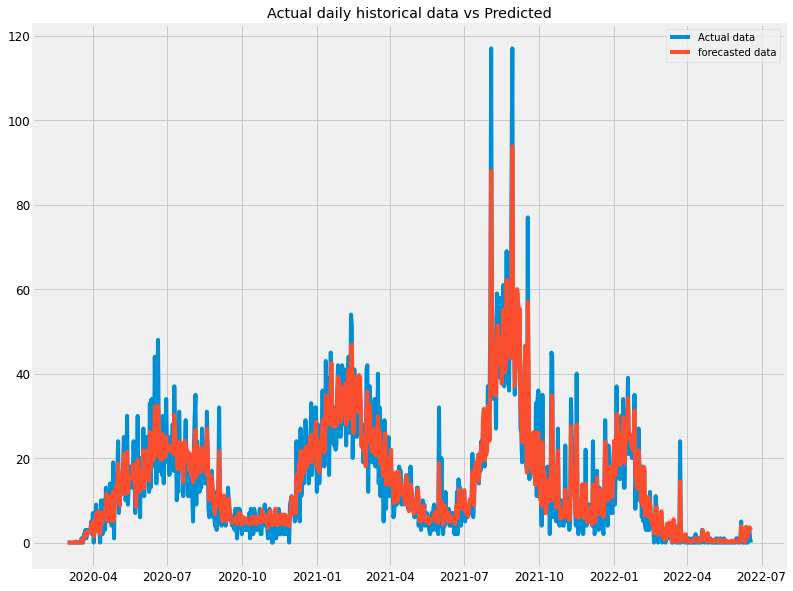

In [ ]:
ind = 0
train_slice = y_train.iloc[ind:]
xticks = train_slice.index.tolist()

plt.plot(xticks, train_slice.values)
plt.plot(xticks, rf_random.best_estimator_.predict(X_train)[ind:])
plt.legend(["Actual data", "forecasted data"])
plt.title("Actual daily historical data vs Predicted")

Text(0.5, 1.0, 'Actual daily historical data vs Predicted for 200 days')

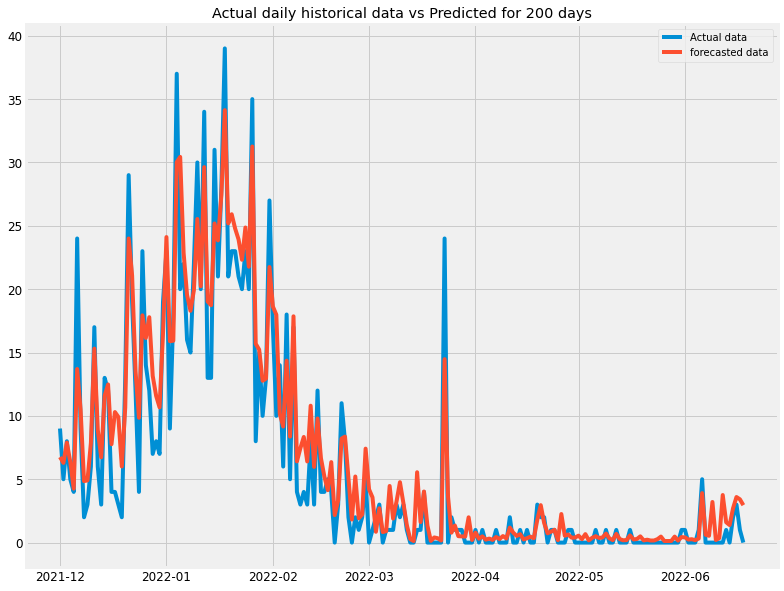

In [ ]:
ind = -200
train_slice = y_train.iloc[ind:]
xticks = train_slice.index.tolist()

plt.plot(xticks, train_slice.values)
plt.plot(xticks, rf_random.best_estimator_.predict(X_train)[ind:])
plt.legend(["Actual data", "forecasted data"])
plt.title(f"Actual daily historical data vs Predicted for {abs(ind)} days")

Text(0.5, 1.0, 'last 100 days plus 14 days forecast and actual')

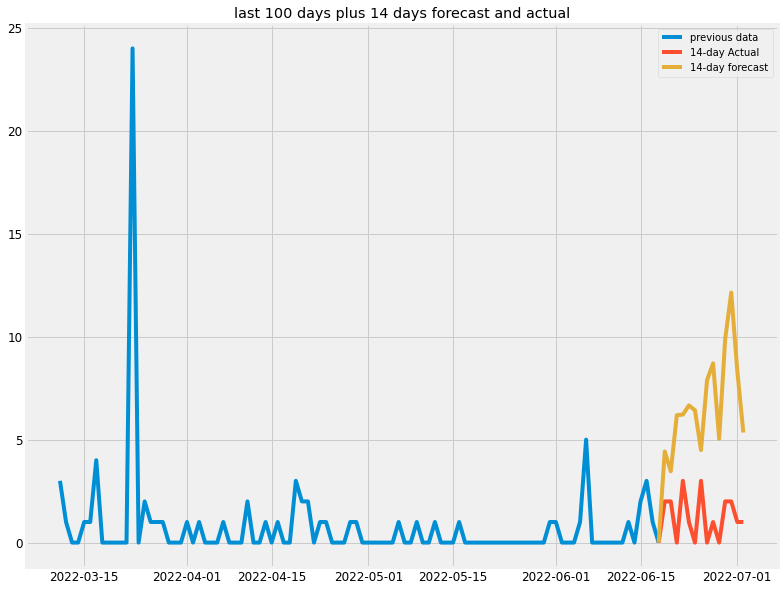

In [ ]:
ind = -100
train_slice = y_train.iloc[ind:]
xticks = train_slice.index.tolist()

n = len(holdout) + 1
forecast = forecast = [train_slice.iloc[-1]] + rf_random.best_estimator_.predict(X_holdout).tolist()
holdout_ = [train_slice.iloc[-1]] + holdout.iloc[:n-1].tolist()
holdout_xticks = pd.date_range(start = xticks[-1], periods = n)

plt.plot(xticks, train_slice.values)
plt.plot(holdout_xticks, holdout_)
plt.plot(holdout_xticks, forecast)

plt.legend(labels = ["previous data", f"{n-1}-day Actual", f"{n-1}-day forecast"])
plt.title(f"last {abs(ind)} days plus {n-1} days forecast and actual")

#### Light Gradient Boosting Model (LGBM)
#### Hyperparameters
(n_estimators, max_depth, learning_rate)
#### Result
MSE mean after cross validation: 4.6515

MSE for heldout data: 32.3548

In [ ]:
lgbm = LGBMRegressor(random_state=seed)

In [ ]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)] + [None]
learning_rate = [0.01, 0.1]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate
              }
print(random_grid)

{'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'learning_rate': [0.01, 0.1]}


In [ ]:
lgbm_random = RandomizedSearchCV(estimator = lgbm, param_distributions = random_grid,
                                 n_iter = 80, cv = TimeSeriesSplit(n_splits= 5, test_size= 14),
                                 verbose=1, random_state=seed, n_jobs = -1,
                                 scoring = "neg_mean_squared_error")
# Fit the random search model
lgbm_random.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=14),
                   estimator=LGBMRegressor(random_state=0), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=1)

In [ ]:
lgbm_random.best_params_

{'n_estimators': 670, 'max_depth': 20, 'learning_rate': 0.01}

In [ ]:
pd.DataFrame(lgbm_random.cv_results_).iloc[:, 5:].sort_values(by = "rank_test_score").head()

,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
48,20,0.01,"{'n_estimators': 670, 'max_depth': 20, 'learni...",-1.845234,-0.720517,-2.998532,-5.084756,-12.608317,-4.651471,4.232226,1
3,60,0.1,"{'n_estimators': 120, 'max_depth': 60, 'learni...",-1.693990,-0.925593,-2.925743,-6.604746,-11.229880,-4.675990,3.812997,2
15,90,0.1,"{'n_estimators': 120, 'max_depth': 90, 'learni...",-1.693990,-0.925593,-2.925743,-6.604746,-11.229880,-4.675990,3.812997,2
16,100,0.1,"{'n_estimators': 120, 'max_depth': 100, 'learn...",-1.693990,-0.925593,-2.925743,-6.604746,-11.229880,-4.675990,3.812997,2
60,40,0.1,"{'n_estimators': 120, 'max_depth': 40, 'learni...",-1.693990,-0.925593,-2.925743,-6.604746,-11.229880,-4.675990,3.812997,2


In [ ]:
best_lgbm = lgbm_random.best_estimator_
lgbm_err = MSE(best_lgbm.predict(X_holdout), y_holdout)

print(f"model_err: {lgbm_err:.2f}")

model_err: 32.35


In [ ]:
lgbm_random.best_score_

-4.651470895367296

In [ ]:
LGBM_err = (abs(lgbm_random.best_score_), lgbm_err)

<AxesSubplot:>

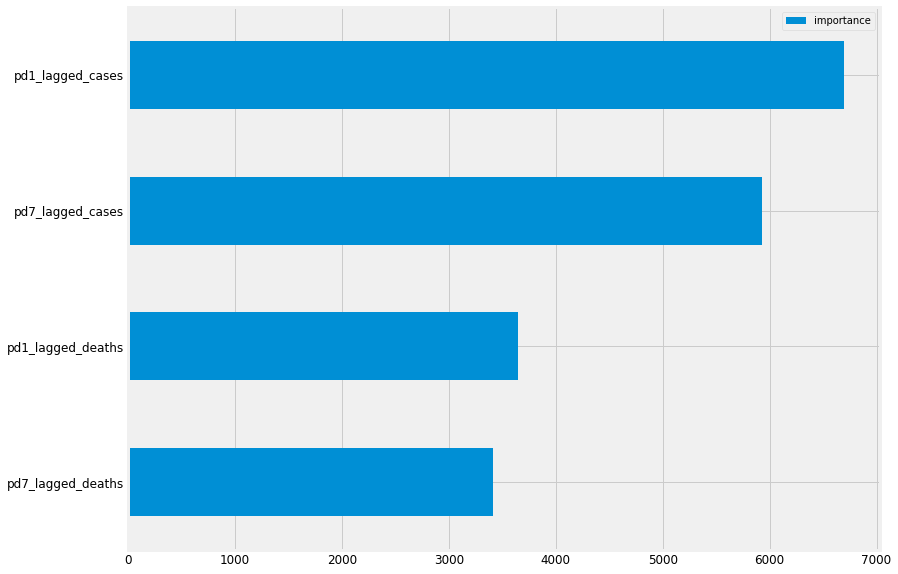

In [ ]:
pd.DataFrame(lgbm_random.best_estimator_.feature_importances_, index = X.columns).sort_values(by = 0, ascending=1)\
            .rename(columns = {0:"importance"}).plot(kind= "barh")

#### Result

Text(0.5, 1.0, 'Actual daily historical data vs Predicted')

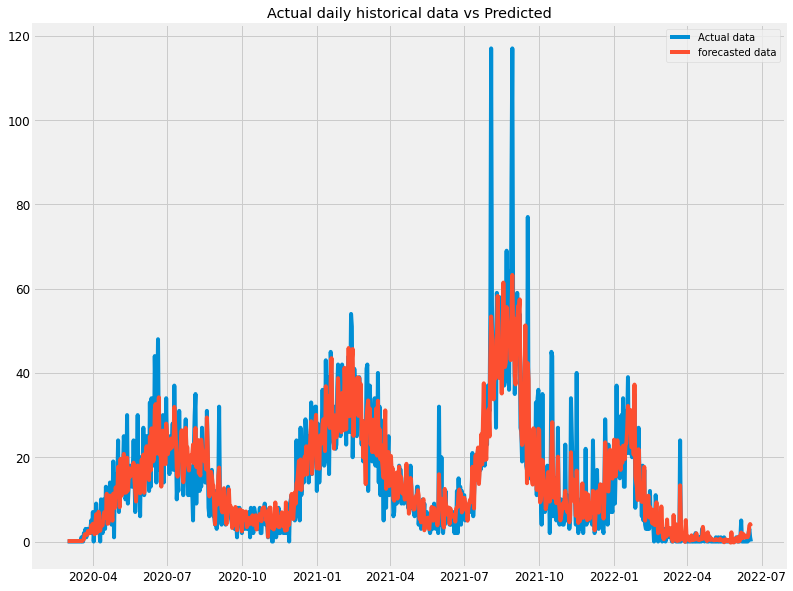

In [ ]:
ind = 0
train_slice = y_train.iloc[ind:]
xticks = train_slice.index.tolist()

plt.plot(xticks, train_slice.values)
plt.plot(xticks, lgbm_random.best_estimator_.predict(X_train)[ind:])
plt.legend(["Actual data", "forecasted data"])
plt.title("Actual daily historical data vs Predicted")

Text(0.5, 1.0, 'Actual daily historical data vs Predicted for 200 days')

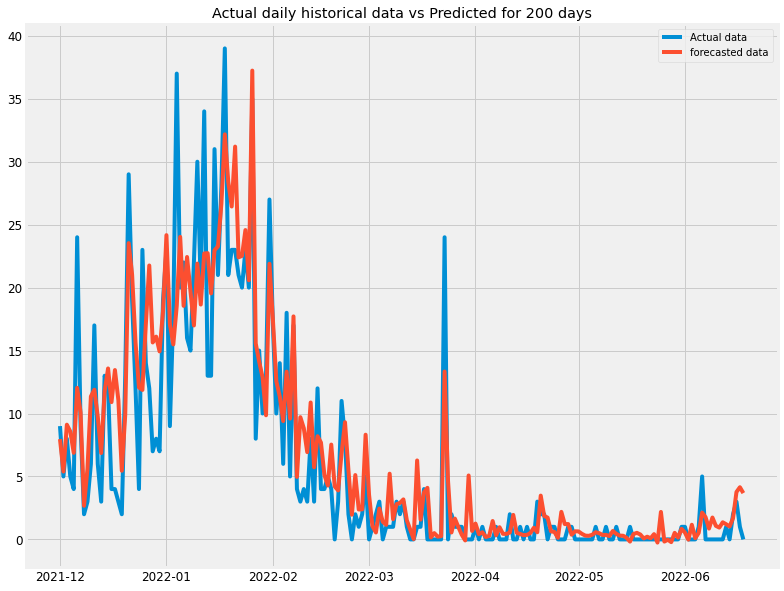

In [ ]:
ind = -200
train_slice = y_train.iloc[ind:]
xticks = train_slice.index.tolist()

plt.plot(xticks, train_slice.values)
plt.plot(xticks, lgbm_random.best_estimator_.predict(X_train)[ind:])
plt.legend(["Actual data", "forecasted data"])
plt.title(f"Actual daily historical data vs Predicted for {abs(ind)} days")

Text(0.5, 1.0, 'last 100 days plus 14 days forecast and actual')

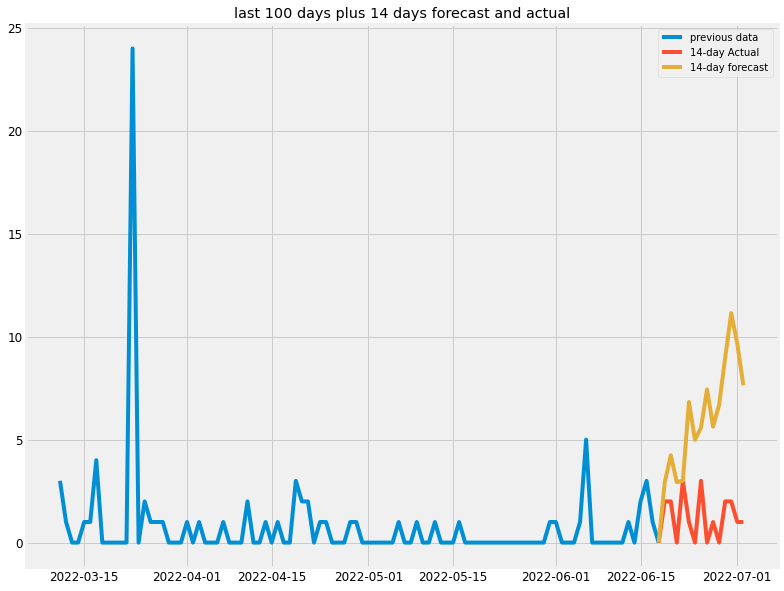

In [ ]:
ind = -100
train_slice = y_train.iloc[ind:]
xticks = train_slice.index.tolist()

n = len(holdout) + 1
forecast = forecast = [train_slice.iloc[-1]] + lgbm_random.best_estimator_.predict(X_holdout).tolist()
holdout_ = [train_slice.iloc[-1]] + holdout.iloc[:n-1].tolist()
holdout_xticks = pd.date_range(start = xticks[-1], periods = n)

plt.plot(xticks, train_slice.values)
plt.plot(holdout_xticks, holdout_)
plt.plot(holdout_xticks, forecast)

plt.legend(labels = ["previous data", f"{n-1}-day Actual", f"{n-1}-day forecast"])
plt.title(f"last {abs(ind)} days plus {n-1} days forecast and actual")

# scratch

### list of MSE errors

In [ ]:
[ARIMA_err, prophet_err, RF_err, LGBM_err]

[(38.34063948227698, 1.1556779260950596),
 (97.41006132803328, 16.034133074515896),
 (13.57188426643712, 36.93914157488367),
 (4.651470895367296, 32.3547937494093)]

# Deployment

To showcase the work done and to make available the prediction model making weekly covid-19 deaths prediction to stakeholders, a webapp will be built with a python open-source app framework, Streamlit. Streamlit is an easy to use library to create simple webapps for reporting by turning python scripts into webapps "https://streamlit.io". With Streamlit little frontend webdevelopment knowledge is needed as the library abstracts it all away as python functions that can be called to perform the same task.

Streamlit also provides a means to deploy the built webapp for free on their cloud infrastructure which makes it a suitable choice for this task.

The ARIMA model which is the best model ascertained after this research work will be deployed using streamlit. The webapp will also make predictions weekly after fetching new data from John Hopkins repo and retraining the ARIMA model with the same parameters used in this research work. The procedures are as follows.

On Every Sundays:
- download the latest covid-19 deaths result from John hopkins
- retrain the model including the new datapoints
- make forecast for each day of the upcoming week.
